In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

2.9.0


In [2]:
dfss = pd.read_parquet(r"D:\RND\Machine_Learning\Datasets/clean_dataset_ml_50_id.parquet")
dfss.fillna(0,inplace=True)
df = dfss.copy()
df['creation_time'] = pd.to_datetime(df['creation_time'])
df.set_index(['creation_time'],drop= True, inplace= True)
df["min"] = df.index.minute
df.sort_index(inplace=True)
df.reset_index(drop=True,inplace=True)
df

,temperature_2m,relative_humidity_2m,apparent_temperature,wind_speed_10m,wind_speed_100m,consumed_unit,lag1,lag2,lag3,lag4,lag5,day,hour,month,dayofweek,dayofyear,label_sensor_id,min
0,12.1,95,10.8,11.4,21.6,0.0,0.00,0.00,0.00,0.00,0.000,1,0,1,0,1,0,15
1,7.4,97,5.2,10.0,19.6,0.0,0.00,0.00,0.00,0.00,0.000,1,0,1,0,1,15,15
2,10.5,79,7.0,18.5,32.1,2.0,0.00,0.00,0.00,0.00,0.000,1,0,1,0,1,12,15
3,7.6,95,4.9,13.3,25.2,0.0,0.00,0.00,0.00,0.00,0.000,1,0,1,0,1,45,15
4,7.7,95,5.1,12.1,23.7,0.0,0.00,0.00,0.00,0.00,0.000,1,0,1,0,1,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225618,17.0,37,13.3,13.5,25.2,0.3,0.29,0.31,2.90,2.70,0.045,25,23,2,6,56,30,0
225619,17.0,37,13.4,12.7,24.8,13.6,13.85,13.69,2.40,2.74,7.600,25,23,2,6,56,29,0
225620,18.7,39,14.6,19.1,34.9,0.1,0.00,0.10,0.00,0.10,0.000,25,23,2,6,56,27,0
225621,17.1,33,12.4,18.6,31.4,0.0,0.20,0.10,0.10,0.30,0.400,25,23,2,6,56,23,0


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temperature_2m,225623.0,17.111500,5.585181,3.7,12.6,17.000,21.80,32.2
relative_humidity_2m,225623.0,48.727625,22.670243,7.0,30.0,45.000,65.00,100.0
apparent_temperature,225623.0,14.391226,5.668952,0.9,9.6,14.300,19.10,28.4
wind_speed_10m,225623.0,11.133231,4.659383,0.0,8.3,10.900,13.40,41.4
wind_speed_100m,225623.0,17.575122,7.839378,0.0,11.9,17.600,22.70,51.8
consumed_unit,225623.0,1.950417,3.882709,0.0,0.0,0.100,2.00,49.0
lag1,225623.0,1.950061,3.882466,0.0,0.0,0.100,2.00,49.0
lag2,225623.0,1.949713,3.882233,0.0,0.0,0.100,2.00,49.0
lag3,225623.0,1.913688,3.854025,0.0,0.0,0.065,2.00,49.0
lag4,225623.0,1.702109,3.677971,0.0,0.0,0.010,1.45,49.0


In [25]:
df_mean = df.mean()
df_std = df.std()
# df = (df - df_mean) / df_std
# df
print(df_mean,df_std)

temperature_2m          17.111500
relative_humidity_2m    48.727625
apparent_temperature    14.391226
wind_speed_10m          11.133231
wind_speed_100m         17.575122
consumed_unit            1.950417
lag1                     1.950061
lag2                     1.949713
lag3                     1.913688
lag4                     1.702109
lag5                     1.412030
day                     14.657544
hour                    11.495769
month                    1.446205
dayofweek                2.998896
dayofyear               28.489884
label_sensor_id         25.261795
min                     22.500033
dtype: float64 temperature_2m           5.585181
relative_humidity_2m    22.670243
apparent_temperature     5.668952
wind_speed_10m           4.659383
wind_speed_100m          7.839378
consumed_unit            3.882709
lag1                     3.882466
lag2                     3.882233
lag3                     3.854025
lag4                     3.677971
lag5                     3.407094

In [22]:
# for col in df.columns:
#     df[col].plot()
#     plt.title(col)
#     plt.show()

In [4]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.8)]
# val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.8):]
print("train_df:",len(train_df),"test_df:",len(test_df))
num_features = df.shape[1]
train_features = train_df.copy()
test_features = test_df.copy()

train_labels = train_features.pop('consumed_unit')
test_labels = test_features.pop('consumed_unit')

train_df: 180498 test_df: 45125


In [8]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))


In [9]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[12.1 95.  10.8 11.4 21.6  0.   0.   0.   0.   0.   1.   0.   1.   0.
   1.   0.  15. ]]

Normalized: [[-0.78  1.9  -0.53  0.2   0.67 -0.5  -0.5  -0.49 -0.45 -0.39 -1.42 -1.66
  -0.67 -1.43 -1.69 -1.6  -0.45]]


In [27]:
train_features

,temperature_2m,relative_humidity_2m,apparent_temperature,wind_speed_10m,wind_speed_100m,lag1,lag2,lag3,lag4,lag5,day,hour,month,dayofweek,dayofyear,label_sensor_id,min
0,12.1,95,10.8,11.4,21.6,0.000,0.000,0.00,0.000,0.000,1,0,1,0,1,0,15
1,7.4,97,5.2,10.0,19.6,0.000,0.000,0.00,0.000,0.000,1,0,1,0,1,15,15
2,10.5,79,7.0,18.5,32.1,0.000,0.000,0.00,0.000,0.000,1,0,1,0,1,12,15
3,7.6,95,4.9,13.3,25.2,0.000,0.000,0.00,0.000,0.000,1,0,1,0,1,45,15
4,7.7,95,5.1,12.1,23.7,0.000,0.000,0.00,0.000,0.000,1,0,1,0,1,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180493,16.3,32,12.0,14.5,24.5,0.010,0.015,0.01,0.015,0.015,14,18,2,2,45,5,30
180494,16.1,33,11.9,14.0,24.8,0.000,0.000,0.00,0.000,0.500,14,18,2,2,45,3,30
180495,15.3,34,11.5,11.1,16.1,0.075,0.070,0.08,0.100,0.090,14,18,2,2,45,26,30
180496,14.6,48,11.9,8.5,21.9,0.000,0.000,0.00,12.000,0.470,14,18,2,2,45,4,30


In [36]:
test_results={}

In [29]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.compile(optimizer='adam', loss='mean_squared_error')


In [31]:
history = linear_model.fit(train_features, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
4513/4513 [==============================] - 8s 2ms/step - loss: 5.0703 - val_loss: 2.2936
Epoch 2/10
4513/4513 [==============================] - 12s 3ms/step - loss: 2.8708 - val_loss: 2.1444
Epoch 3/10
4513/4513 [==============================] - 18s 4ms/step - loss: 2.8514 - val_loss: 2.1250
Epoch 4/10
4513/4513 [==============================] - 19s 4ms/step - loss: 2.8468 - val_loss: 2.1208
Epoch 5/10
4513/4513 [==============================] - 18s 4ms/step - loss: 2.8458 - val_loss: 2.1266
Epoch 6/10
4513/4513 [==============================] - 19s 4ms/step - loss: 2.8454 - val_loss: 2.1207
Epoch 7/10
4513/4513 [==============================] - 19s 4ms/step - loss: 2.8454 - val_loss: 2.1277
Epoch 8/10
4513/4513 [==============================] - 19s 4ms/step - loss: 2.8455 - val_loss: 2.1160
Epoch 9/10
4513/4513 [==============================] - 19s 4ms/step - loss: 2.8452 - val_loss: 2.1202
Epoch 10/10
4513/4513 [==============================] - 18s 4ms/step - lo

In [32]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 87ms/step


array([[0.101],
       [0.096],
       [0.05 ],
       [0.073],
       [0.08 ],
       [0.093],
       [0.067],
       [0.073],
       [0.083],
       [0.065]], dtype=float32)

In [33]:
linear_model.layers[1].kernel

<tf.Variable 'dense_10/kernel:0' shape=(17, 1) dtype=float32, numpy=
array([[ 0.125],
       [ 0.028],
       [-0.091],
       [ 0.   ],
       [-0.038],
       [ 2.524],
       [ 0.757],
       [ 0.405],
       [-0.017],
       [ 0.026],
       [-0.142],
       [ 0.006],
       [-0.215],
       [-0.011],
       [ 0.176],
       [-0.   ],
       [ 0.014]], dtype=float32)>

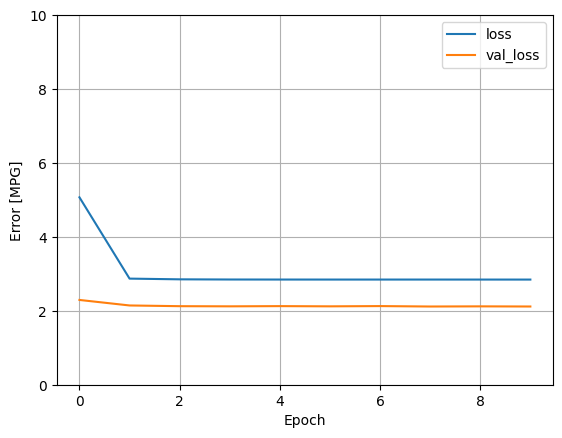

In [35]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
  
plot_loss(history)

In [37]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [38]:
test_results

{'linear_model': 2.5061709880828857}

In [44]:

model = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu',input_shape=(17,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

model.compile(loss='mean_absolute_error',
            # optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
            optimizer=tf.keras.optimizers.Adam(0.001),
            metrics=['mean_squared_error',])

## with SGD

In [43]:
history = model.fit(train_features, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
4513/4513 [==============================] - 11s 2ms/step - loss: 0.6082 - mean_squared_error: 3.2249 - mean_absolute_percentage_error: 122466136.0000 - val_loss: 0.6039 - val_mean_squared_error: 2.4309 - val_mean_absolute_percentage_error: 72799728.0000
Epoch 2/10
4513/4513 [==============================] - 11s 2ms/step - loss: 0.5728 - mean_squared_error: 3.0927 - mean_absolute_percentage_error: 108785408.0000 - val_loss: 0.4927 - val_mean_squared_error: 2.1764 - val_mean_absolute_percentage_error: 86439752.0000
Epoch 3/10
4513/4513 [==============================] - 11s 2ms/step - loss: 0.5559 - mean_squared_error: 3.0275 - mean_absolute_percentage_error: 103650776.0000 - val_loss: 0.5009 - val_mean_squared_error: 2.2909 - val_mean_absolute_percentage_error: 93149344.0000
Epoch 4/10
4513/4513 [==============================] - 21s 5ms/step - loss: 0.5513 - mean_squared_error: 2.9900 - mean_absolute_percentage_error: 103141232.0000 - val_loss: 0.4925 - val_mean_squared_er

### with adam

In [45]:
history = model.fit(train_features, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
4513/4513 [==============================] - 11s 2ms/step - loss: 0.5977 - mean_squared_error: 3.1802 - val_loss: 0.5138 - val_mean_squared_error: 2.2968
Epoch 2/10
4513/4513 [==============================] - 11s 2ms/step - loss: 0.5487 - mean_squared_error: 3.0303 - val_loss: 0.5098 - val_mean_squared_error: 2.2528
Epoch 3/10
4513/4513 [==============================] - 11s 2ms/step - loss: 0.5362 - mean_squared_error: 2.9998 - val_loss: 0.4855 - val_mean_squared_error: 2.2707
Epoch 4/10
4513/4513 [==============================] - 10s 2ms/step - loss: 0.5261 - mean_squared_error: 2.9381 - val_loss: 0.4865 - val_mean_squared_error: 2.2423
Epoch 5/10
4513/4513 [==============================] - 11s 3ms/step - loss: 0.5196 - mean_squared_error: 2.8865 - val_loss: 0.4681 - val_mean_squared_error: 2.1978
Epoch 6/10
4513/4513 [==============================] - 12s 3ms/step - loss: 0.5152 - mean_squared_error: 2.8441 - val_loss: 0.4676 - val_mean_squared_error: 2.1715
Epoch 7/10

In [46]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 17)               35        
 n)                                                              
                                                                 
 dense_20 (Dense)            (None, 64)                1152      
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,412
Trainable params: 5,377
Non-trainable params: 35
_________________________________________________________________


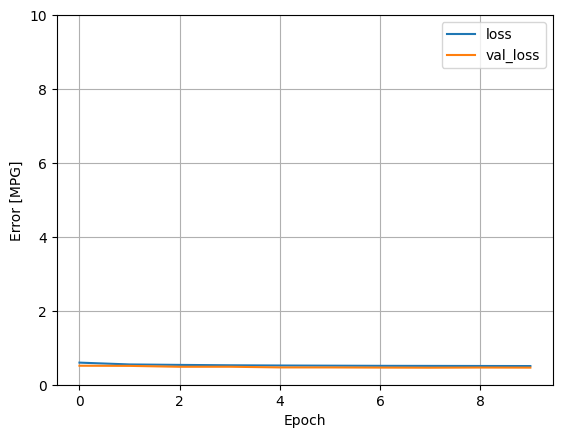

In [47]:
plot_loss(history)

In [ ]:
MAX_EPOCHS = 20

dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64,input = (1,17),activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history